In [1]:
import pandas as pd
import matplotlib as plt
import numpy as py
import seaborn as sns

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

ontime_performance = early_count+late_count+ontime_count / ontime_count

In [3]:
early_count = sum(wego['ADJUSTED_EARLY_COUNT'])
early_count

9775

In [4]:
late_count = sum(wego['ADJUSTED_LATE_COUNT'])
late_count

59038

In [5]:
ontime_count = sum(wego['ADJUSTED_ONTIME_COUNT'])
ontime_count

270048

In [6]:
full_count = early_count+late_count+ontime_count
full_count

338861

In [7]:
ontime_perf = ontime_count / full_count *100
ontime_perf

79.69285341187094

on-time performance is 79.69%

what do the overall distributions of adherence and headway deviation look like?
'distribution' = histogram

In [8]:
wego.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.5,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.0,NaN


In [9]:
wego_dev = wego.dropna()
wego_dev.head(1)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0


In [10]:
deviation = wego_dev.sort_values(by='HDWY_DEV', ascending=False)
deviation

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
70364,120230813,3,99799282,2023-08-13,22,2200,2793,350040,0,TO DOWNTOWN,...,268.983333,238.983333,0,0,1,0,0.0,0,8.700000,8.0
70444,120230813,3,99799364,2023-08-13,22,2201,2254,350116,0,TO DOWNTOWN,...,240.016666,180.016666,0,0,1,0,0.0,0,4.100000,9.0
252575,120230914,1,99947748,2023-09-14,22,2202,2549,350139,0,TO DOWNTOWN,...,198.866666,148.866666,0,0,1,0,0.0,0,10.433333,15.0
174849,120230831,1,100324733,2023-08-31,22,2211,1761,350264,0,TO DOWNTOWN,...,150.066666,125.066666,0,0,1,0,0.0,0,5.283333,3.0
189597,120230902,2,100390765,2023-09-02,52,5210,2580,352147,0,TO DOWNTOWN,...,122.483333,82.483333,0,1,0,0,0.0,0,7.633333,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299321,120230922,1,100145222,2023-09-22,22,2200,2374,349958,0,TO DOWNTOWN,...,17.133333,-32.866667,0,0,1,0,0.0,0,13.600000,15.0
108917,120230819,2,99991408,2023-08-19,52,5211,2706,352197,0,TO DOWNTOWN,...,11.900000,-39.100000,0,0,1,0,0.0,0,23.966666,28.0
108930,120230819,2,99991421,2023-08-19,52,5211,2706,352199,0,TO DOWNTOWN,...,21.750000,-39.250000,0,0,1,0,0.0,0,19.483333,21.0
170961,120230830,1,100294482,2023-08-30,52,5201,1880,352011,1,TO DOWNTOWN,...,0.316666,-42.683334,0,0,1,0,1.0,0,18.700000,21.0


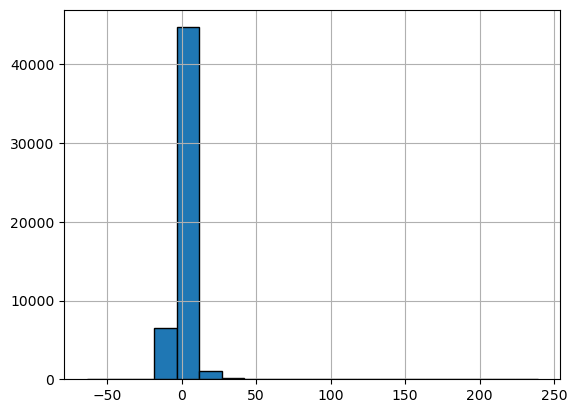

In [23]:
# Plot histogram for column 'A'
deviation['HDWY_DEV'].hist(bins=20, edgecolor='black');